In [ ]:
!pip install git+https://github.com/huggingface/diffusers transformers torchsde
!pip install accelerate

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-57vgjdq1
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-57vgjdq1
  Resolved https://github.com/huggingface/diffusers to commit 35cc66dc4ca73313fbfcc0ab55014969ed655a3e


In [ ]:
import torch
from diffusers import MotionAdapter, AnimateDiffPipeline
from diffusers.pipelines import DiffusionPipeline
from diffusers.schedulers import DPMSolverMultistepScheduler
from diffusers.utils import export_to_gif
from IPython.display import display, Image as displayImage

In [ ]:
motion_id = "guoyww/animatediff-motion-adapter-v1-5-2" # "CiaraRowles/TemporalDiff"
adapter = MotionAdapter.from_pretrained(motion_id)

# Some config attributes are not expected and therefore not passed to MotionAdapter
# Open cell to see details

In [ ]:
from diffusers import ControlNetModel
controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11p_sd15_openpose", torch_dtype=torch.float16)

In [ ]:
from diffusers import AutoencoderKL
vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse", torch_dtype=torch.float16)

In [ ]:
model_id = "SG161222/Realistic_Vision_V5.1_noVAE"
# model_id = "stablediffusionapi/dreamshaper-v8"
pipe = DiffusionPipeline.from_pretrained(
    model_id,
    motion_adapter=adapter,
    controlnet=controlnet,
    vae=vae,
    custom_pipeline="pipeline_animatediff_controlnet",
).to(device="cuda", dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_pretrained(
    model_id, subfolder="scheduler", clip_sample=False, timestep_spacing="linspace", steps_offset=1, final_sigmas_type="sigma_min"
)

In [ ]:
pipe.enable_vae_slicing()
# pipe.enable_model_cpu_offload()

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
# Check if this snippet is still needed

import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
from IPython.display import display
from PIL import Image

# Directory containing the PNG frames
frames_directory = "/path/to/your/frames/directory"

# List to store frames
openpose_frames = []

# Load existing frames
for i in range(1, 16 + 1):
    frame_path = os.path.join(frames_directory, f"frame_{i}.png")
    if os.path.exists(frame_path):
        openpose_frames.append(Image.open(frame_path))
    else:
        print(f"File not found: {frame_path}")

# Load an image from a .npy file
npy_image_path = "/Users/brunopardodieguez/Downloads/Pose_test_0.984.npy"
if os.path.exists(npy_image_path):
    npy_image = np.load(npy_image_path)
    # Convert the numpy array to a PIL Image
    your_image = Image.fromarray(npy_image.astype('uint8'))
    # Append the image to the frames list
    openpose_frames.append(your_image)
else:
    print(f"File not found: {npy_image_path}")

# Verify if the image was added successfully
print(f"Total frames: {len(openpose_frames)}")

In [ ]:
# Path to the folder containing the npy files
folder_path = '/content/drive/MyDrive/Computer_Science/Poses_test'

# List all npy files in the folder and take only the first 16
npy_files = sorted(glob(os.path.join(folder_path, '*.npy')))[:16]

# Check if npy_files is not empty
if not npy_files:
    raise ValueError("No npy files found in the specified folder.")

# Load the npy files as images and convert them to PIL Images
openpose_frames = [Image.fromarray(np.load(file).astype('uint8')) for file in npy_files]

# Verify if the images were added successfully
print(f"Total frames: {len(openpose_frames)}")

# Display the first image as a test
openpose_frames[0].show()

Total frames: 16


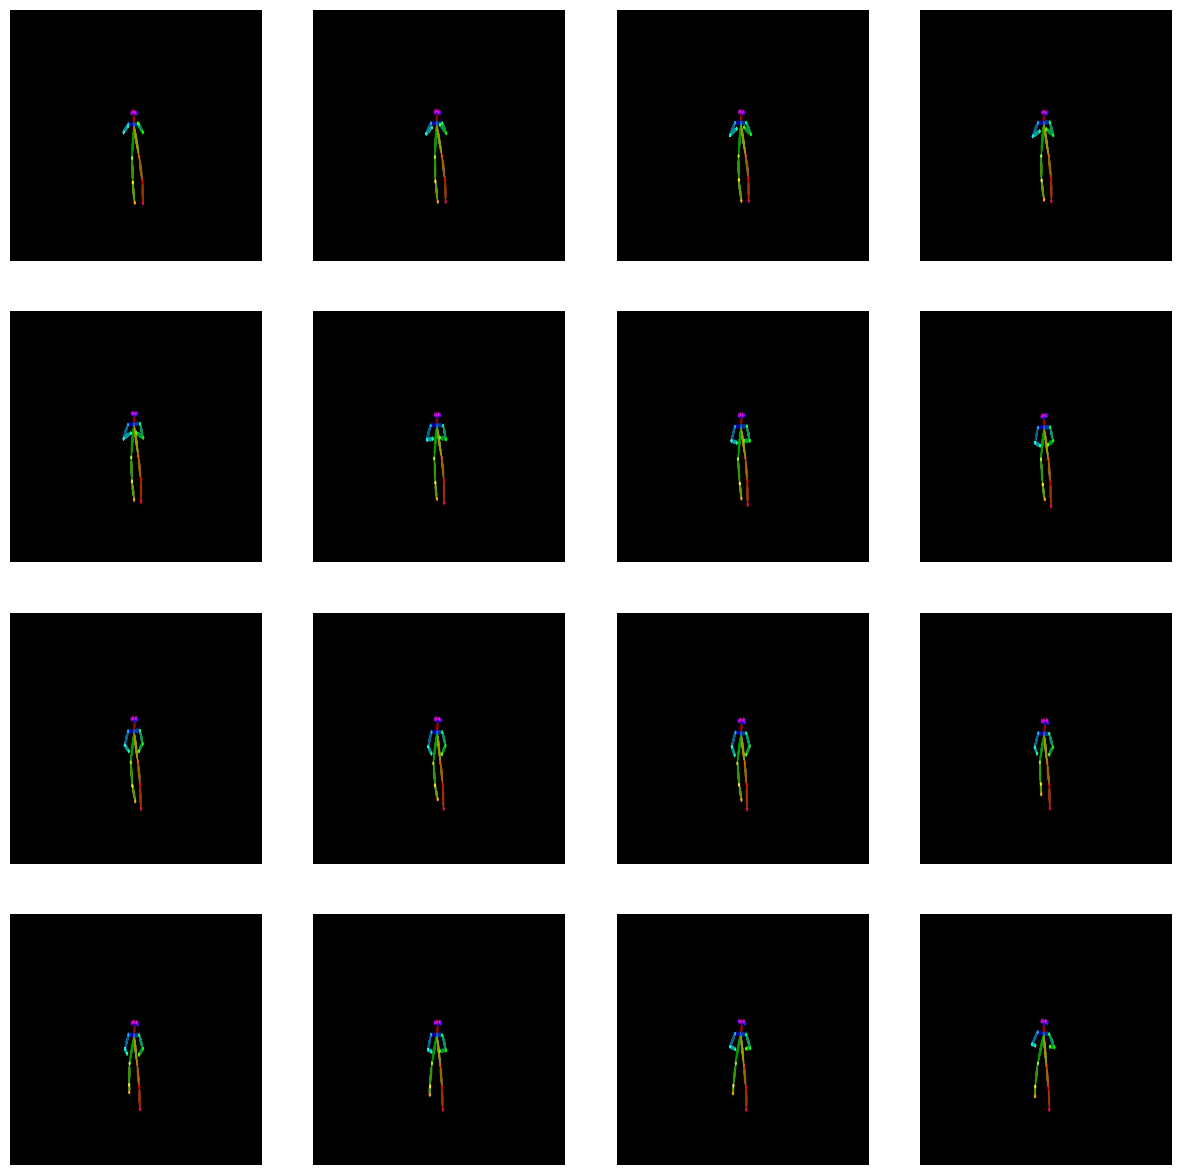

In [ ]:
from PIL import Image
from typing import List

# Function to create an image grid
def image_grid(images, rows, cols):
    total_images = rows * cols
    images_to_display = images[:total_images]

    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    for ax, img in zip(axes.flatten(), images_to_display):
        ax.imshow(img)
        ax.axis('off')
    for ax in axes.flatten()[len(images_to_display):]:
        ax.axis('off')
    plt.show()

# Example usage with openpose_frames
image_grid(openpose_frames, 4, 4)

In [1]:
prompt = "A hip-hop dancer in an urban environment. The dancer should be wearing modern streetwear with bold, contemporary styles. The background should depict a lively cityscape with graffiti walls, busting streets, and vibrant lights."
negative_prompt = "(deformed iris, deformed pupils, semi-realistic, cgi, 3d, render, sketch, cartoon, drawing, anime:1.4), text, close up, cropped, out of frame, worst quality, low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck"
result = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    # width=512,
    # height=768,
    width=384,
    height=512,
    conditioning_frames=openpose_frames,
    num_inference_steps=12,
)

NameError: name 'pipe' is not defined

In [ ]:
export_to_gif(result.frames[0], "result.gif")
display(displayImage("result.gif", embed=True))

In [ ]:
!wget -O cardosanime.fp16.safetensors https://civitai.com/api/download/models/43825?type=Model&format=SafeTensor&size=pruned&fp=fp16

In [ ]:
!wget https://raw.githubusercontent.com/huggingface/diffusers/main/scripts/convert_original_stable_diffusion_to_diffusers.py

In [ ]:
!pip install omegaconf

In [ ]:
!python convert_original_stable_diffusion_to_diffusers.py --checkpoint_path cardosanime.fp16.safetensors --dump_path CardosAnime/ --from_safetensors

In [ ]:
model_id = "CardosAnime"
pipe = DiffusionPipeline.from_pretrained(
    model_id,
    motion_adapter=adapter,
    controlnet=controlnet,
    vae=vae,
    custom_pipeline="pipeline_animatediff_controlnet",
).to(device="cuda", dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_pretrained(
    model_id, subfolder="scheduler", clip_sample=False, timestep_spacing="linspace", steps_offset=1
)

In [ ]:
pipe.enable_vae_slicing()

In [ ]:
# prompt = "1girl, cyborg, robot, futuristic background, solo, dancing, pretty, long hair"
prompt = "add prompt here"
negative_prompt = "(deformed iris, deformed pupils, semi-realistic, cgi, 3d, render, sketch, cartoon, drawing, anime:1.4), text, close up, cropped, out of frame, worst quality, low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck"
result = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    width=512,
    height=768,
    # width=384,
    # height=512,
    openpose_frames=openpose_frames,
    num_inference_steps=12,
)

  0%|          | 0/12 [00:00<?, ?it/s]

In [ ]:
export_to_gif(result.frames[0], "result.gif")
display(displayImage("result.gif", embed=True))

In [ ]:
from diffusers import DDIMScheduler
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)

In [ ]:
prompt = "add prompt here"
negative_prompt = "(deformed iris, deformed pupils, semi-realistic, cgi, 3d, render, sketch, cartoon, drawing, anime:1.4), text, close up, cropped, out of frame, worst quality, low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck"
result = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    # width=512,
    # height=768,
    width=384,
    height=512,
    conditioning_frames=openpose_frames,
    num_inference_steps=20,
)

In [ ]:
export_to_gif(result.frames[0], "result.gif")
display(displayImage("result.gif", embed=True))

In [ ]:
prompt = "add prompt here"
negative_prompt = "(deformed iris, deformed pupils, semi-realistic, cgi, 3d, render, sketch, cartoon, drawing, anime:1.4), text, close up, cropped, out of frame, worst quality, low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck"
result = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    # width=512,
    # height=768,
    width=384,
    height=512,
    conditioning_frames=openpose_frames,
    num_inference_steps=20,
)

In [ ]:
export_to_gif(result.frames[0], "result2.gif")
display(displayImage("result2.gif", embed=True))

In [ ]:
# model_id = "SG161222/Realistic_Vision_V5.1_noVAE"
model_id = "a-r-r-o-w/dreamshaper-xl-turbo"
pipe = DiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    variant="fp16",
    motion_adapter=adapter,
    controlnet=controlnet,
    vae=vae,
    custom_pipeline="pipeline_animatediff_controlnet",
).to(device="cuda", dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_pretrained(
    model_id, subfolder="scheduler", clip_sample=False, timestep_spacing="linspace", steps_offset=1
)